In [6]:
import numpy as np
import pandas as pd
#import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

# Configure Quandl


In [7]:
# Import API key from file
#import API_config

In [8]:
# Quandl API Auth
#quandl.ApiConfig.api_key = API_config.API_KEY

# Get the Data


In [11]:
# Set start and end date for stock prices
#start_date = datetime.date(2009, 3,8)
#end_date = datetime.date.today()
# Load data from Quandl
#data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file

data=pd.read_csv('sap_stock.csv')

In [12]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [13]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [14]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [15]:
# Display features in data set
data.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

# Select Subset with relevant features
We use the daily closing price Close as the value to predict, so we can discard the other features.

'Close' column has numerical data type
The 'Date' is the index column and contains datetime values

In [21]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [22]:
df.head()


,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


In [23]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Date    2550 non-null   object 
 2   Close   2550 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [24]:
# Check for missing values in the columns
df.isna().values.any()

False

# Explore the Data
When we take a look at the price movement over time by simply plotting the Closing price vs Time, we can already see, that the price continously increases over time and we can also estimate that trend could be linear.

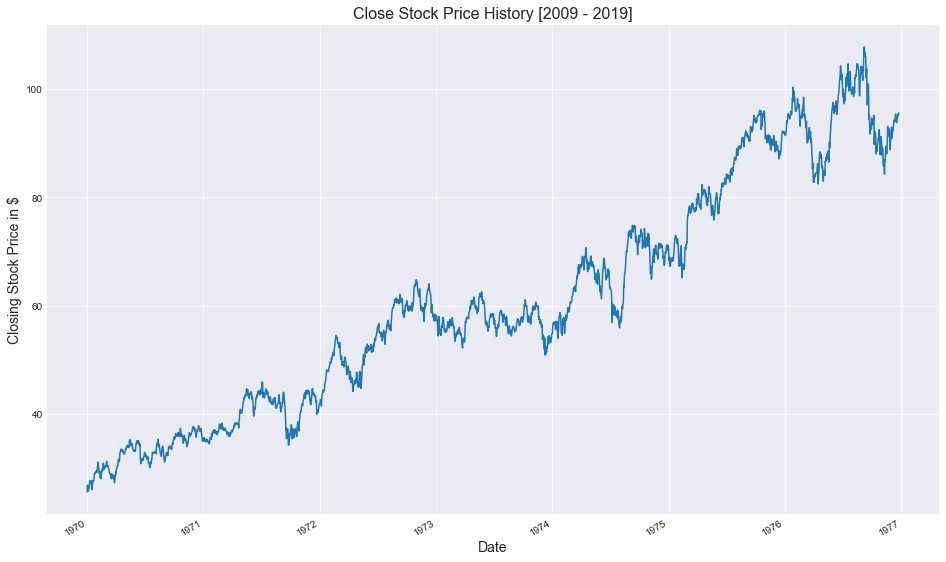

In [28]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Linear Regression
Our data contains only one independent variable ($X$)</strong> which represents the <em>date</em> and the <strong>dependent variable ($Y$)</strong> we are trying to predict is the <em>Stock Price</em>. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a Simple Linear Regression.

The best fit line can be described with
$$
Y = \beta_0 + \beta_1 X
$$

where

$Y$ is the predicted value of the dependent variable
$\beta_0$ is the y-intercept
$\beta_1$ is the slope
$X$ is the value of the independent variable
The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the Sum of Squared Errors, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

# Training a Linear Regression Model

# Train Test Split


In [30]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [31]:

# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

# Create and Train the Model


In [32]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [33]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']


In [34]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation


In [35]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.02770587725209107
Intercept:  25.711284612104535


<ipython-input-35-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


Interpreting the coefficients:

The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.0276 $
The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

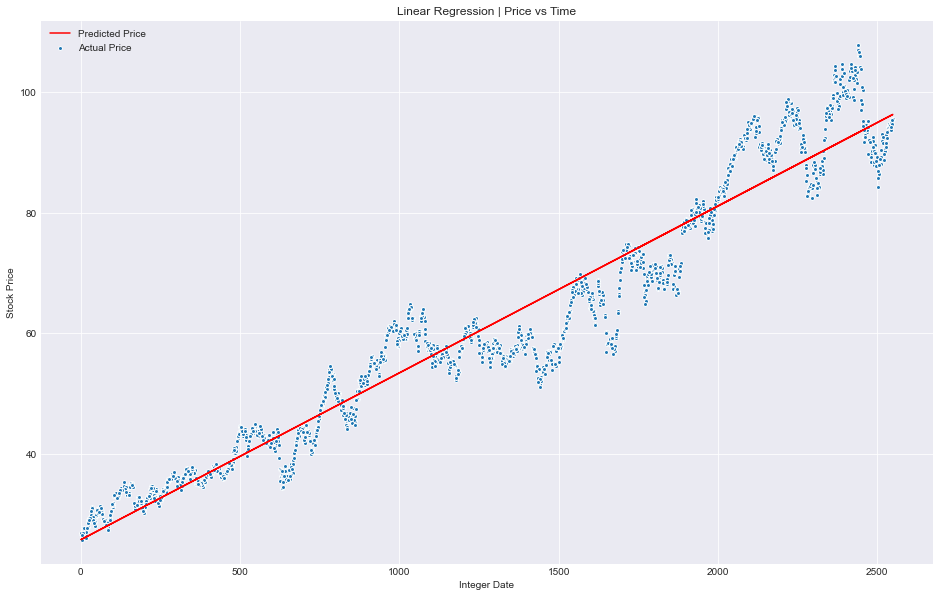

In [36]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Prediction from our Model

In [37]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [38]:
# Generate array with predicted values
y_pred = model.predict(X_test)


# Regression Evaluation
Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [39]:

# Get number of rows in data set for random sample
df.shape

(2550, 3)

In [40]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [41]:
df_sample.head()

,index,Date,Close
21,21,2009-04-07,27.77
63,63,2009-06-04,30.29
238,238,2010-02-04,33.80
362,362,2010-07-30,35.04
423,423,2010-10-25,38.18


KeyError: "['Prediction'] not in index"

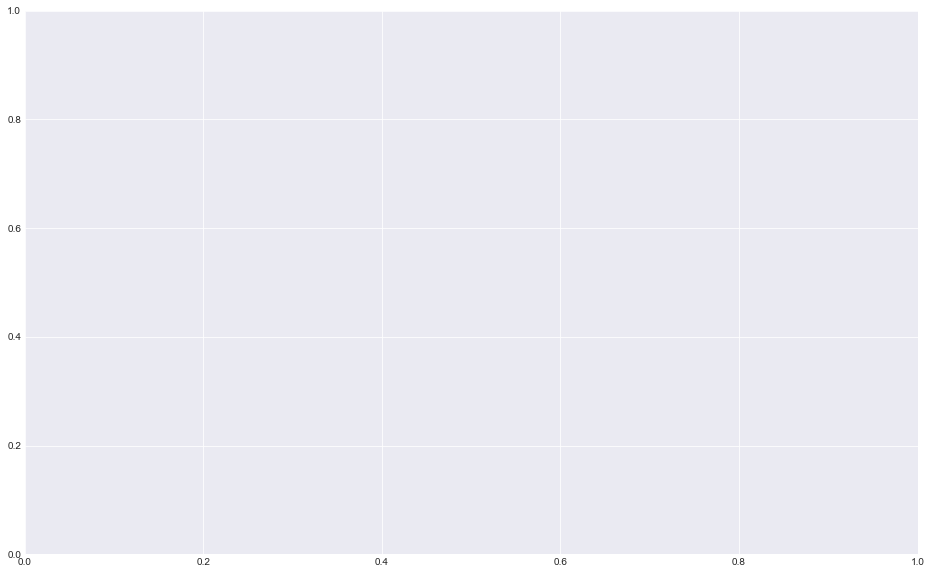

In [42]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()